In [648]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Análisis de los Resultados de las Elecciones de Bolivia 2019

Se usaron los datos del recuento definitivo que se encuentran en https://computo.oep.org.bo/

Solo se analizan los resultados de los 2 partidos con mas votos.

En todos los gráficos rojo representa al MAS y azul al CC.

Se utiliza la cantidad de votos válidos por municipio como representación del tamaño del municipio.


In [669]:
# https://computo.oep.org.bo/PubResul/acta.2019.10.25.21.09.30.xlsx
df = pd.read_excel('data/acta.2019.10.25.21.09.30.xlsx')

In [670]:
df.columns = ['pais', 'n_depto', 'depto', 'prov',
       'n_mun', 'mun', 'circuns', 'local',
       'recinto', 'n_mesa', 'cod_mesa', 'eleccion', 'inscritos', 'CC',
       'FPV', 'MTS', 'UCS', 'MAS', '21F', 'PDC', 'MNR', 'PAN',
       'validos', 'blancos', 'nulos', 'estado']

In [671]:
df_bol = df[df['pais'] == 'Bolivia'].copy()
df_bol['MAS_p'] = df_bol.MAS / df_bol.validos
df_bol['CC_p'] = df_bol.CC / df_bol.validos

por_pais = df.groupby('pais').sum()
por_pais['MAS_p'] = por_pais.MAS / por_pais.validos
por_pais['CC_p'] = por_pais.CC / por_pais.validos

por_depto = df_bol.groupby('depto').sum()
por_depto['MAS_p'] = por_depto.MAS / por_depto.validos
por_depto['CC_p'] = por_depto.CC / por_depto.validos

por_mun = df_bol.groupby('mun').sum()
por_mun['MAS_p'] = por_mun.MAS / por_mun.validos
por_mun['CC_p'] = por_mun.CC / por_mun.validos
por_mun['log_validos'] = np.log(por_mun.validos)

for mun in por_mun.index:
    df_bol.loc[df_bol.mun == mun, 'validos_mun'] = por_mun.loc[mun,'validos']

votos = pd.concat([
                por_mun[['MAS_p','MAS','validos','log_validos']].rename(columns={'MAS_p':'porcentaje','MAS':'cantidad'}),
                por_mun[['CC_p','CC', 'validos','log_validos']].rename(columns={'CC_p':'porcentaje', 'CC':'cantidad'})
            ])
votos.loc[:por_mun.shape[0], 'partido'] = 'MAS'
votos.loc[por_mun.shape[0]:, 'partido'] = 'CC'
votos_mas = votos[votos.partido=='MAS']
votos_cc = votos[votos.partido=='CC']

# Distrubución de la Población

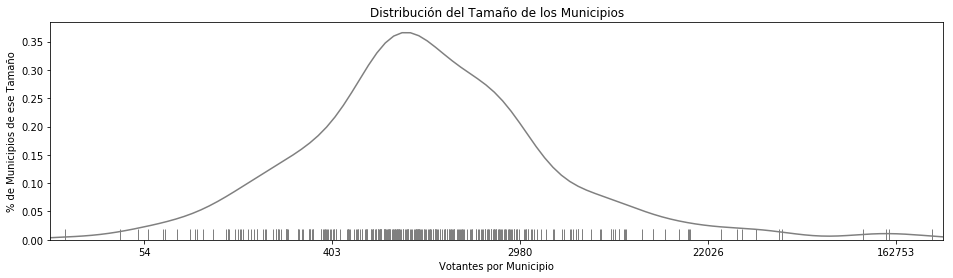

In [703]:
fig = plt.figure(figsize=(16,4))
ax = sns.distplot(np.log(por_mun.validos), color='grey', rug=True, hist=False)
fig.canvas.draw()
locs, labels = plt.xticks()
ax.set(xticklabels=[int(2.71828 ** int(i.get_text())) for i in labels])
plt.xlim(5,14.5)
plt.xlabel('Votantes por Municipio')
plt.ylabel('% de Municipios de ese Tamaño')
_ = plt.title('Distribución del Tamaño de los Municipios')

In [673]:
mayores = por_mun[por_mun.validos > 150000]
medianas = por_mun[por_mun.validos.between(10000,150000)]
menores = por_mun[por_mun.validos < 10000]
mayores.index.values.tolist()
print("10 mayores ciudades representan el %.2f%% de votantes" % (mayores.validos.sum() * 100/ df_bol.validos.sum()))
print("Las ciudades entre 10 mil y 150 mil votantes representan el %.2f%% de votantes" % (medianas.validos.sum() * 100/ df_bol.validos.sum()))
print("Los pueblos de menos de 10 mil votantes representan el %.2f%% de votantes\n" % (menores.validos.sum() * 100/ df_bol.validos.sum()))
print((mayores.validos * 100/ df_bol.validos.sum()).sort_values(ascending=False))

10 mayores ciudades representan el 58.88% de votantes
Las ciudades entre 10 mil y 150 mil votantes representan el 32.68% de votantes
Los pueblos de menos de 10 mil votantes representan el 8.44% de votantes

mun
Santa Cruz de La Sierra     16.131832
El Alto                     10.202580
Nuestra Señora de La Paz     9.900049
Cochabamba                   7.791364
Oruro                        3.272441
Sucre                        3.175943
Tarija                       2.502831
Potosí                       2.137724
Sacaba                       2.044450
Quillacollo                  1.725206
Name: validos, dtype: float64


# Distribución de % Votos por Municipios

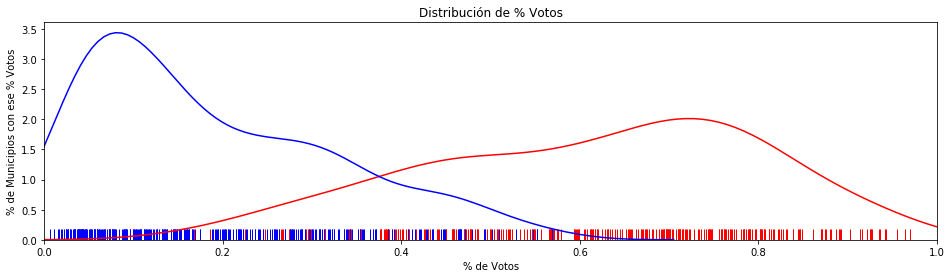

In [674]:
fig = plt.figure(figsize=(16,4))
ax = sns.distplot(por_mun.MAS_p, color='red', rug=True, hist=False)
ax = sns.distplot(por_mun.CC_p, color='blue', rug=True, hist=False)
plt.xlim(0,1)
plt.xlabel('% de Votos')
plt.ylabel('% de Municipios con ese % Votos')
_ = plt.title('Distribución de % Votos')

# Distribución de los Votos según el Tamaño de los Municipios

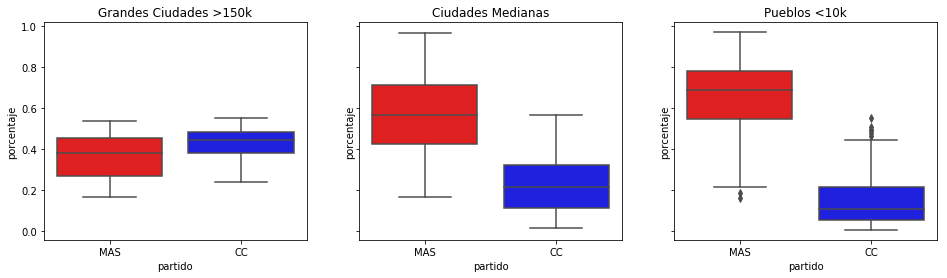

In [675]:
fig, axes = plt.subplots(1, 3, figsize=(16,4), sharey='row')
votos_mayores = votos[votos.validos > 150000]
votos_medianas = votos[votos.validos.between(10000,150000)]
votos_menores = votos[votos.validos < 10000]
axes[0].set_title('Grandes Ciudades >150k')
axes[1].set_title('Ciudades Medianas')
axes[2].set_title('Pueblos <10k')
sns.boxplot(  y="porcentaje", x= "partido", data=votos_mayores,  orient='v' , ax=axes[0], palette={'CC':'blue', 'MAS':'red'})
sns.boxplot(  y="porcentaje", x= "partido", data=votos_medianas,  orient='v' , ax=axes[1], palette={'CC':'blue', 'MAS':'red'})
sns.boxplot(  y="porcentaje", x= "partido", data=votos_menores,  orient='v' , ax=axes[2], palette={'CC':'blue', 'MAS':'red'})


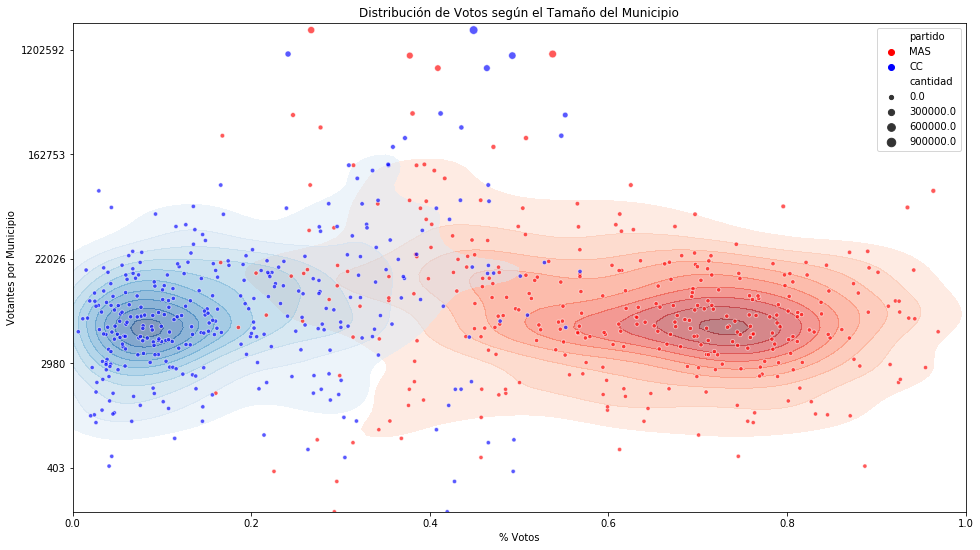

In [696]:
fig = plt.figure(figsize=(16,9))

scatter_df = por_mun
scatter_y = scatter_df.log_validos
density_df = por_mun
density_y = density_df.log_validos

plt.ylim(density_y.min(),density_y.max()*1.01)
plt.xlim(0,1)
plt.title('Distribución de Votos según el Tamaño del Municipio')

ax=fig.axes[0]
ax=sns.kdeplot(votos_mas.porcentaje, votos_mas.log_validos, cmap='Reds', shade=True, shade_lowest=False, alpha=0.5, ax=ax)
sns.kdeplot(votos_cc.porcentaje, votos_cc.log_validos, cmap='Blues', shade=True, shade_lowest=False, alpha=0.5, ax=ax)
sns.scatterplot(x='porcentaje', y='log_validos', hue='partido', data=votos, size='cantidad', palette={'MAS':'red','CC':'blue'}, alpha=0.65, ax=ax, legend='brief')

fig.canvas.draw()
locs, labels = plt.yticks()
ax.set(yticklabels=[int(2.71828 ** float(i.get_text())) for i in labels])

plt.xlabel('% Votos')
_ = plt.ylabel('Votantes por Municipio')

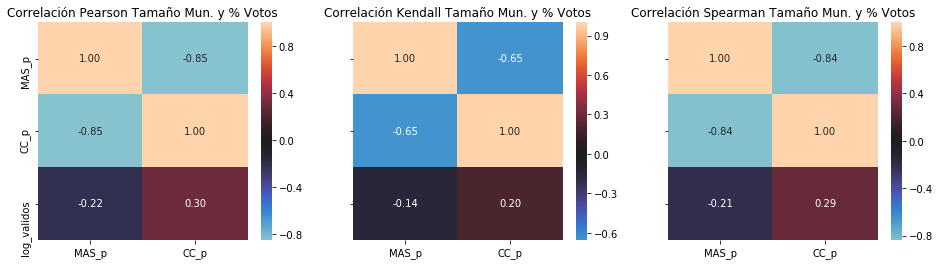

In [682]:
fig, axes = plt.subplots(1, 3, figsize=(16,4), sharey=True)
axes[0].set_title('Correlación Pearson Tamaño Mun. y % Votos')
axes[1].set_title('Correlación Kendall Tamaño Mun. y % Votos')
axes[2].set_title('Correlación Spearman Tamaño Mun. y % Votos')
sns.heatmap(por_mun[['MAS_p','CC_p','log_validos']].corr(method='pearson')[['MAS_p','CC_p']], center=0, annot=True, fmt=".2f", ax=axes[0])
sns.heatmap(por_mun[['MAS_p','CC_p','log_validos']].corr(method='kendall')[['MAS_p','CC_p']], center=0, annot=True, fmt=".2f", ax=axes[1])
_ = sns.heatmap(por_mun[['MAS_p','CC_p','log_validos']].corr(method='spearman')[['MAS_p','CC_p']], center=0, annot=True, fmt=".2f", ax=axes[2])


In [695]:
min_corr = 2/(por_mun.shape[0]**0.5)
print("La correlacion es significativa si su valor absoluto es mayor a %.2f" % min_corr)

La correlacion es significativa si su valor absoluto es mayor a 0.11


# Conclusión

En las grandes ciudades hubo un porcentaje de votos más bajo por el MAS mientras que este fue mayor en las ciudades medianas y pueblos.